In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from random import randrange
from scipy.optimize import curve_fit
from scipy.optimize import OptimizeWarning
from scipy.stats import chi2
import warnings
import sys
import colorcet as cc
import multiprocessing

sys.path.append(os.path.join(os.path.dirname(
    os.path.abspath(''))))
import common.plots as plots
import common.potential_data as potential_data
import common.fit as fit

warnings.simplefilter("ignore", OptimizeWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [10]:
def potential_T_dependence_gluodynamics(lattice_size, L, beta, smearing, additional_params, decomposition_type, smearing_max, copy=None):
    # paths = [{'path': f'../../result/potential/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/{lattice_size}/beta{beta}/{smearing}/{additional_params}/potential_{decomposition_type}.csv',
    #           'parameters': {'beta': f'beta={beta}'}, 'constraints': {'space_size': (1, L // 2), 'time_size': (1, L // 4 * 3), 'smearing_step': (0, smearing_max)}}]
    paths = [{'path': f'../../result/potential/smearing/wilson_loop/fundamental/on-axis/su3/gluodynamics/{lattice_size}/beta{beta}/{smearing}/{additional_params}/potential_{decomposition_type}.csv',
              'parameters': {'beta': f'beta={beta}'}, 'constraints': {'smearing_step': (0, smearing_max)}}]
    if copy is not None:
        paths[0]['constraints'] = {'copy': (copy, copy)}
    image_path = f'../../images/smearing/potential/su3/gluodynamics/T_dependence/{lattice_size}/beta{beta}/{smearing}/{additional_params}/{decomposition_type}'
    image_name = f'potential_abelian_smearing'
    data = potential_data.get_potantial_df(paths)
    print(data)
    for r in data['space_size'].unique():
        fg = plots.make_plot(data[data['space_size'] == r], 'time_size', 'aV(r)', 'smearing_step', 'T', 'aV(r)', f'{decomposition_type} T_dependence r={r}', image_path, f'potential_{decomposition_type}_T_dependence_r={r}', False, err='err', color_palette=cc.glasbey)
        plots.save_image(image_path, f'potential_{decomposition_type}_T_dependence_r={r}', fg)
        plt.close()

# comparison of T dependence of potential from ordinary algorithm and gevp
def potential_T_dependence_ordinary_gevp_comparison(lattice_size, beta, smearing, additional_params, decomposition_type, smearing_num, copy=None):
    paths_gevp = [{'path': f'../../result/potential_gevp/fundamental/on-axis/su3/gluodynamics/{lattice_size}/{beta}/{decomposition_type}/{smearing}/{additional_params}/potential_{decomposition_type}.csv',
              'parameters': {'algorithm': 'gevp'}, 'constraints': {'time_size': (1, 22)}}]
    paths_ordinary = [{'path': f'../../result/potential/wilson_gevp/fundamental/on-axis/su3/gluodynamics/{lattice_size}/{beta}/{smearing}/{additional_params}/potential_{decomposition_type}.csv',
              'parameters': {'algorithm': 'ordinary'}, 'constraints': {'smearing_step': (smearing_num, smearing_num)}}]
    if copy is not None:
        paths_gevp[0]['path'] = paths_gevp[0]['path'][:paths_gevp[0]['path'].find('.csv')] + f'_{copy}' + '.csv'
    if copy is not None:
        paths_ordinary[0]['constraints'] = {'smearing_step': (smearing_num, smearing_num), 'copy': (copy, copy)}
    else:
        paths_ordinary[0]['constraints'] = {'smearing_step': (smearing_num, smearing_num)}
    df_gevp = potential_data.get_potantial_df(paths_gevp)
    df_gevp = df_gevp.rename(columns={'potential': 'aV(r)'})
    df_ordinary = potential_data.get_potantial_df(paths_ordinary)
    df_ordinary = df_ordinary.drop('smearing_step', axis=1)
    if copy is not None:
        df_ordinary = df_ordinary.drop('copy', axis=1)
    # print(df_ordinary[(df_ordinary['time_size'] == 1) & (df_ordinary['space_size'] == 1)])
    df = pd.concat([df_gevp, df_ordinary])
    df = df[df['time_size'] < 40]
    # print(df)
    image_path = f'../../images/potential/su3/gluodynamics/algorithm_comparison/{lattice_size}/beta{beta}/{smearing}/{additional_params}/{decomposition_type}'
    image_name = f'potential_abelian_smearing'
    for r in df['space_size'].unique():
        fg = plots.make_plot(df[df['space_size'] == r], 'time_size', 'aV(r)', 'algorithm', 'T', 'aV(r)', f'{decomposition_type} T_dependence r={r}', image_path, f'potential_{decomposition_type}_T_dependence_r={r}', False, err='err', color_palette=cc.glasbey)
        plots.save_image(image_path, f'potential_{decomposition_type}_T_dependence_r={r}', fg)
        plt.close()

In [13]:
potential_T_dependence_ordinary_gevp_comparison('24^4', 'beta6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.5', 'steps_0/copies=20', 'monopole', 121, copy=0)

In [12]:
potential_T_dependence_ordinary_gevp_comparison('24^4', 'beta6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.5', 'steps_100/copies=20', 'monopole', 31)

In [4]:
for decomposition_type in ['abelian', 'monopole', 'monopoless', 'offdiagonal', 'photon']:
    potential_T_dependence_ordinary_gevp_comparison('24^4', 'beta6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.5', 'steps_100/copies=20', decomposition_type, 31)

FileNotFoundError: [Errno 2] No such file or directory: '../../result/potential_gevp/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/abelian/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_100/copies=20/potential.csv'

In [16]:
for decomposition_type in ['abelian', 'monopole', 'monopoless', 'offdiagonal', 'photon']:
    potential_T_dependence_ordinary_gevp_comparison('24^4', 'beta6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.5', 'steps_100/copies=20', decomposition_type, 31, copy=0)

FileNotFoundError: [Errno 2] No such file or directory: '../../result/potential_gevp/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/abelian/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_100/copies=20/potential_0.csv'

In [3]:
potential_T_dependence_ordinary_gevp_comparison('16^4', 'beta6.1', 'HYP0_alpha=1_1_0.5_APE_alpha=0.5', 'steps_0/copies=10', 'offdiagonal', 31, copy=0)

FileNotFoundError: [Errno 2] No such file or directory: '../../result/potential_gevp/fundamental/on-axis/su3/gluodynamics/16^4/beta6.1/offdiagonal/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_0/copies=10/potential_0.csv'

     space_size  time_size     aV(r)       err algorithm
0             1          2  0.158904  0.000024      gevp
1             1          3  0.159642  0.000008      gevp
2             1          4  0.160369  0.000007      gevp
3             1          5  0.161105  0.000007      gevp
4             1          6  0.161866  0.000007      gevp
..          ...        ...       ...       ...       ...
979          16         35  0.000000  0.000000  ordinary
980          16         36  0.126372  1.936721  ordinary
981          16         37  0.125591  2.218850  ordinary
982          16         38 -1.615478  3.689363  ordinary
983          16         39  0.222403  0.552302  ordinary

[1232 rows x 5 columns]


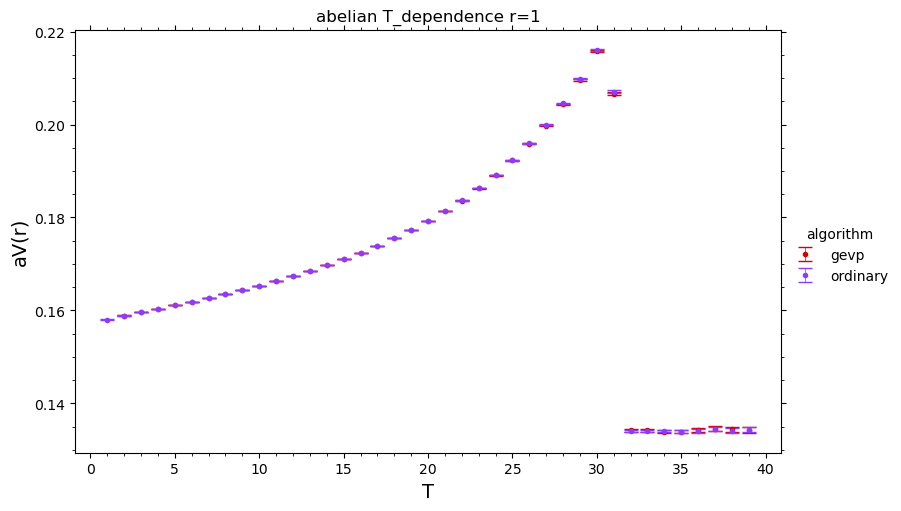

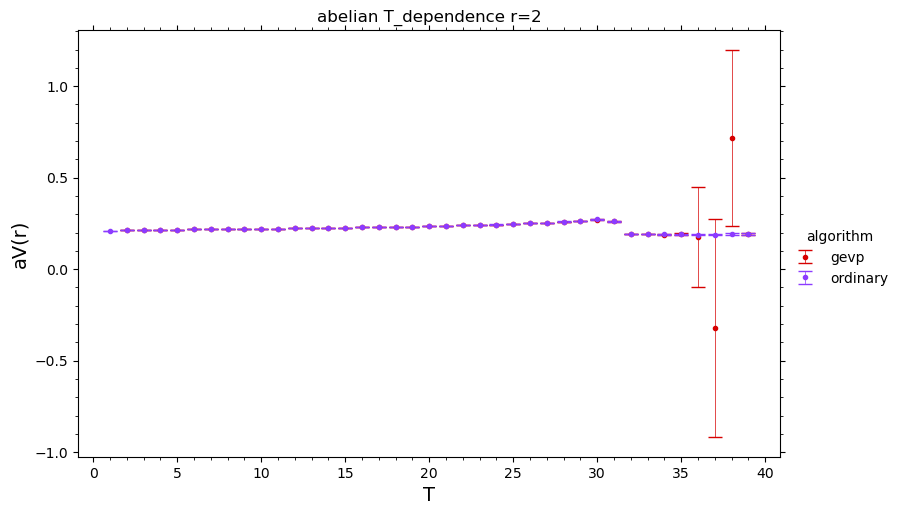

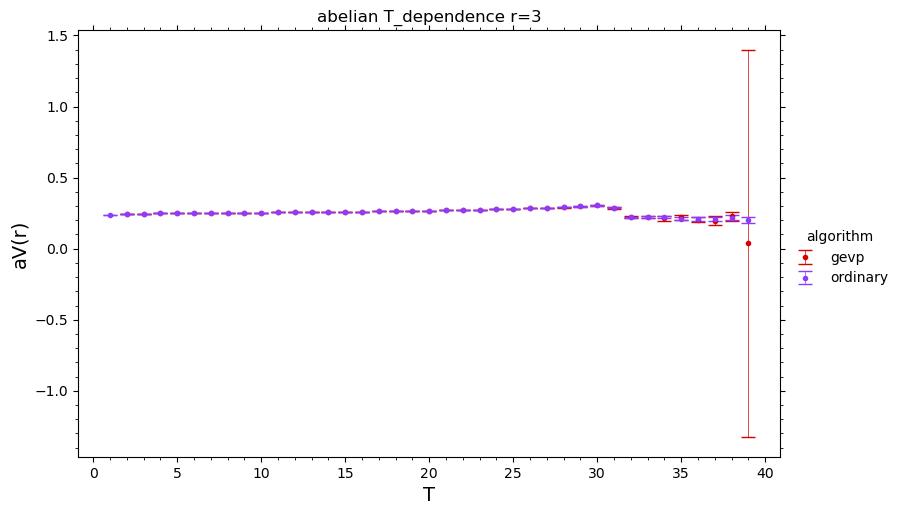

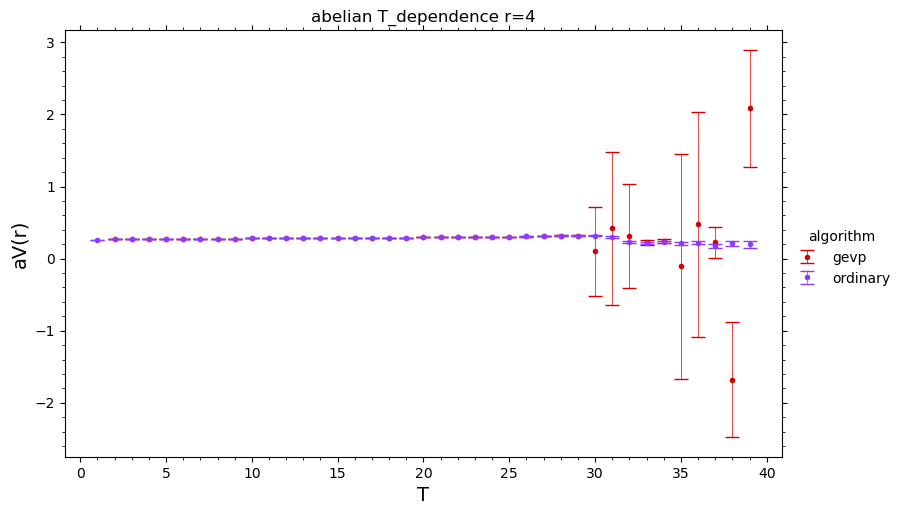

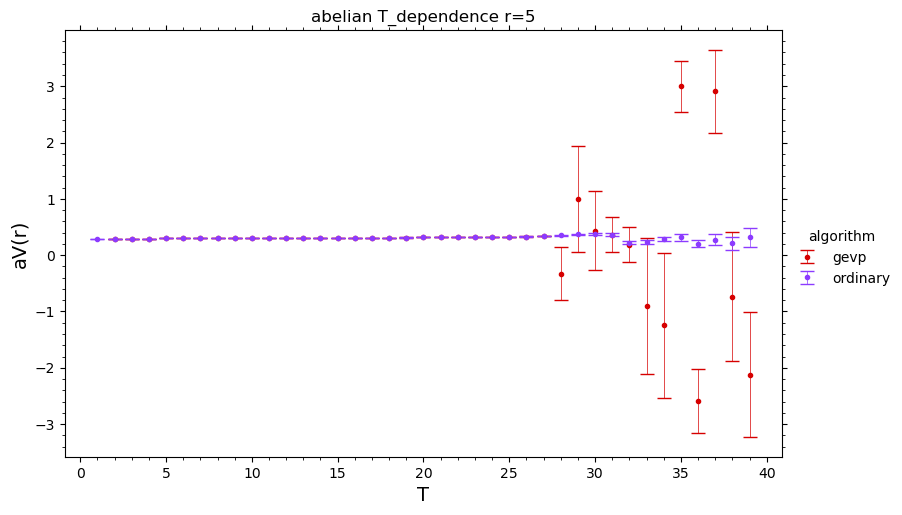

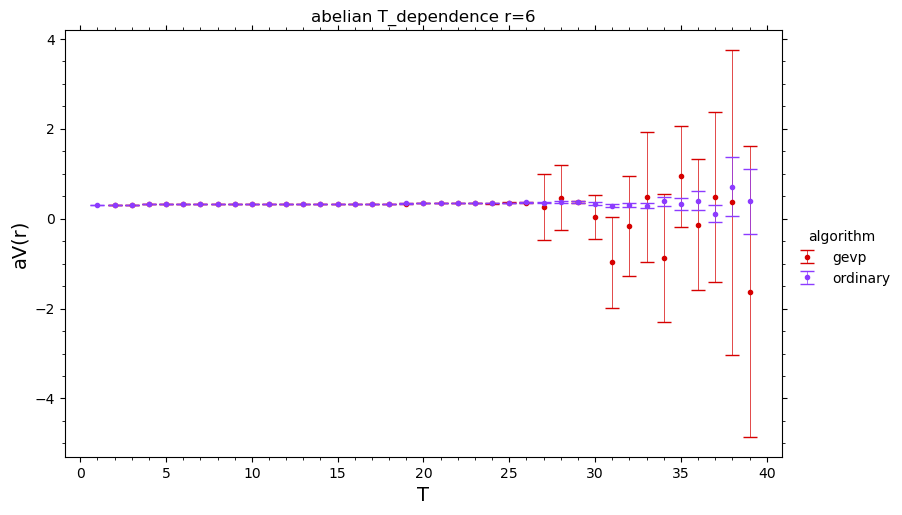

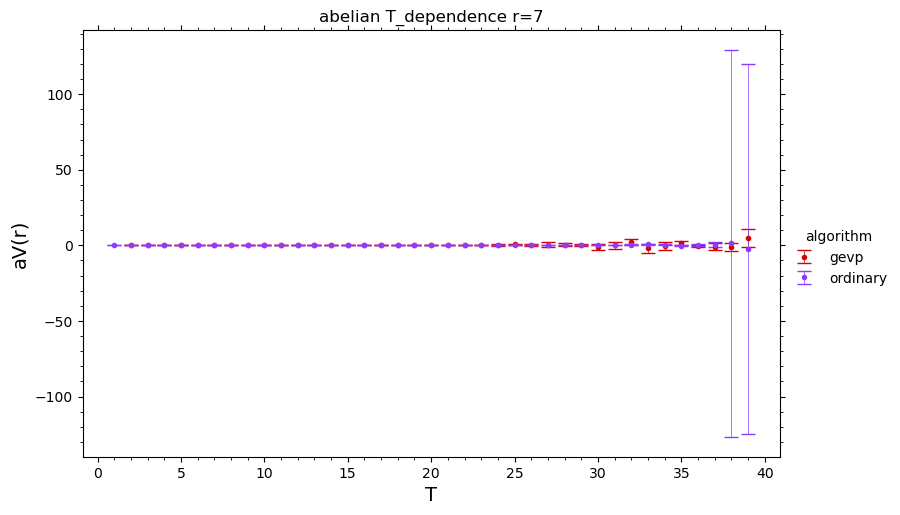

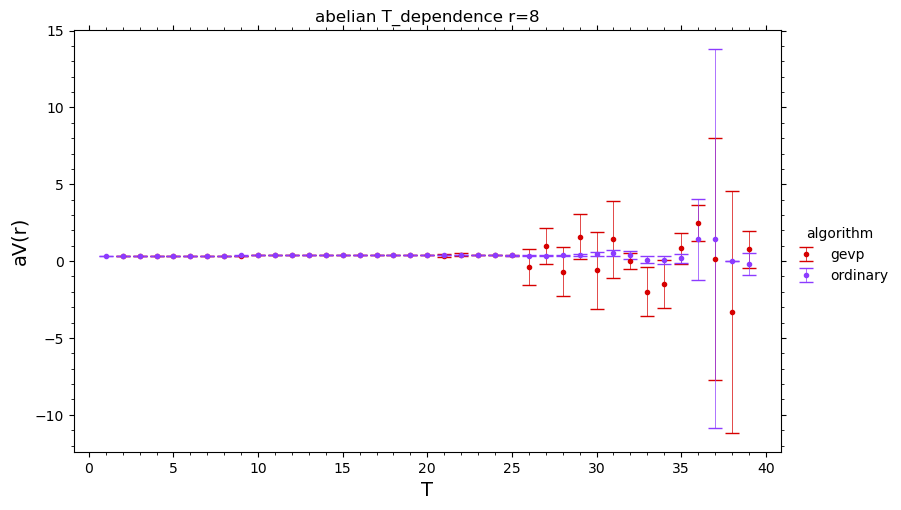

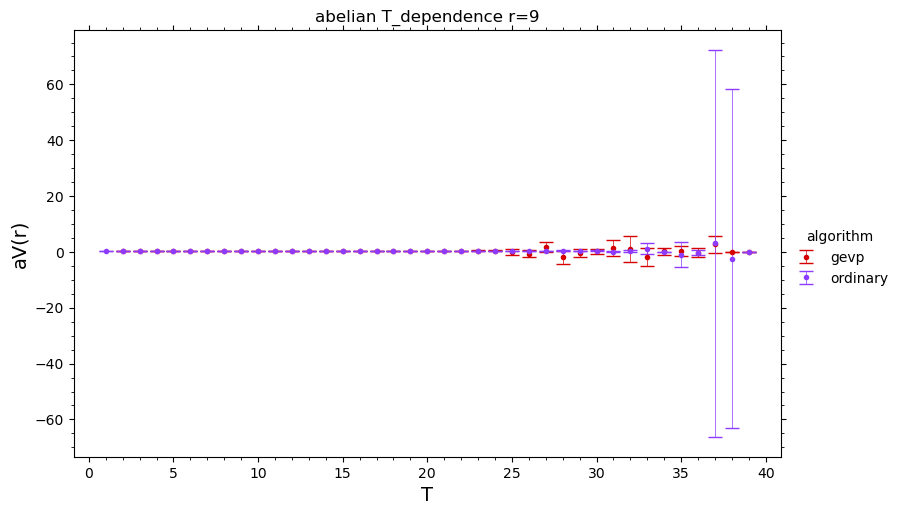

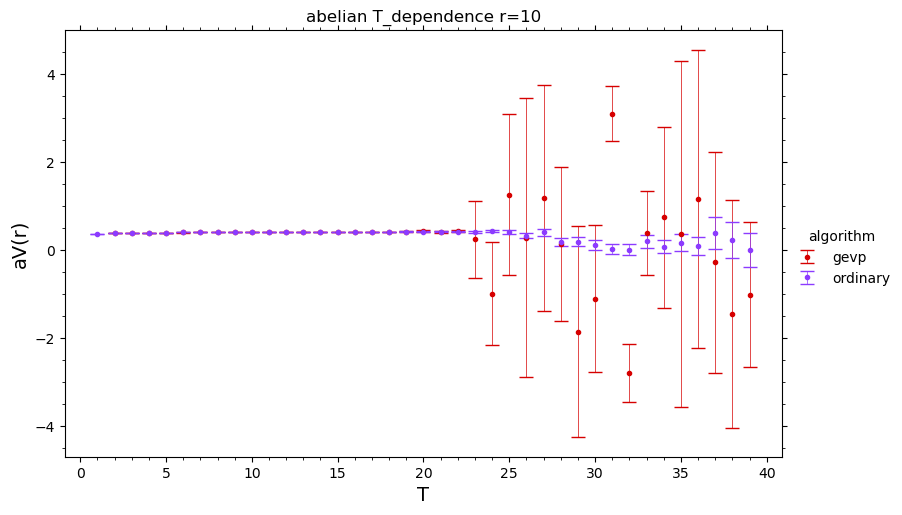

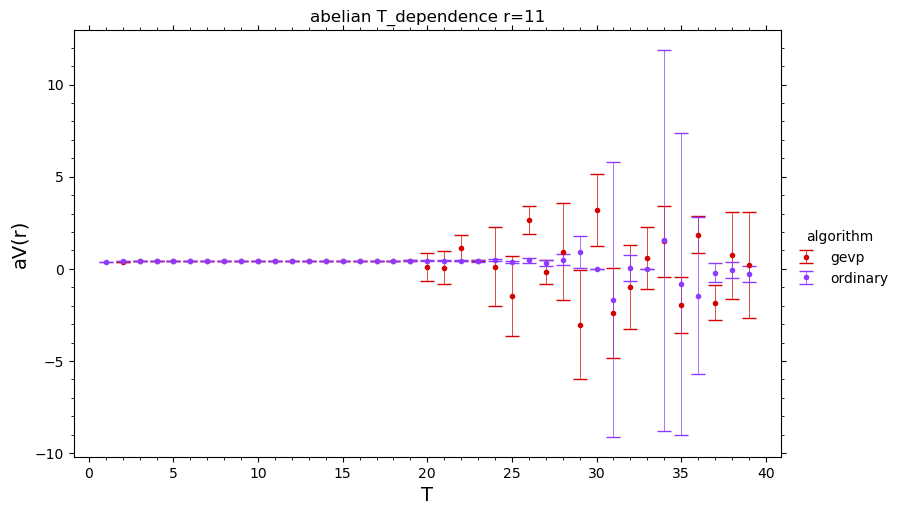

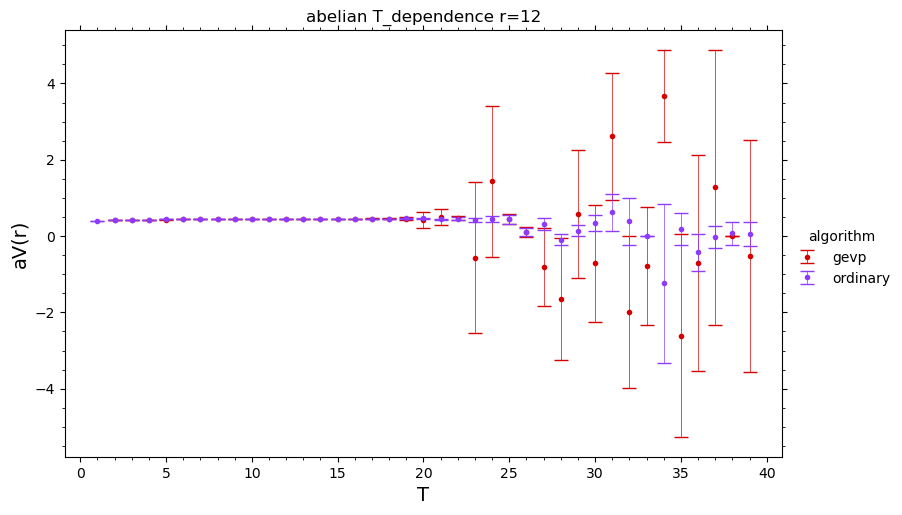

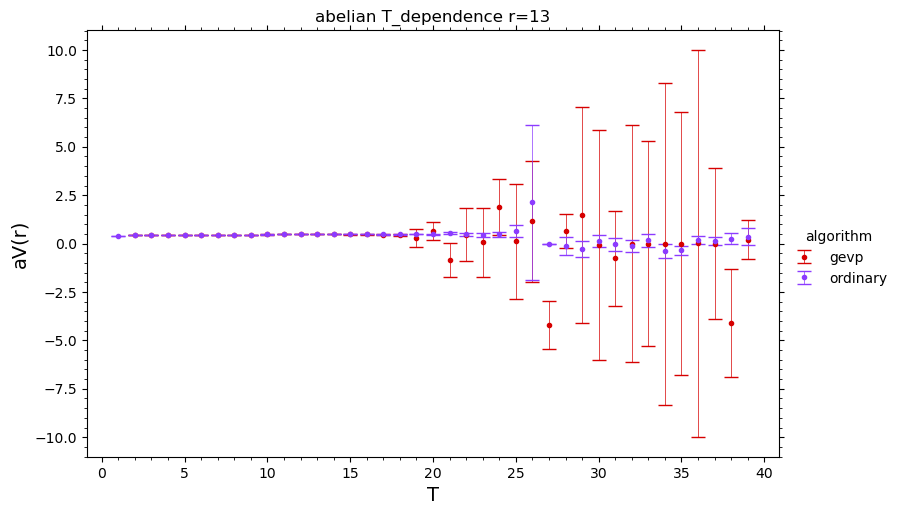

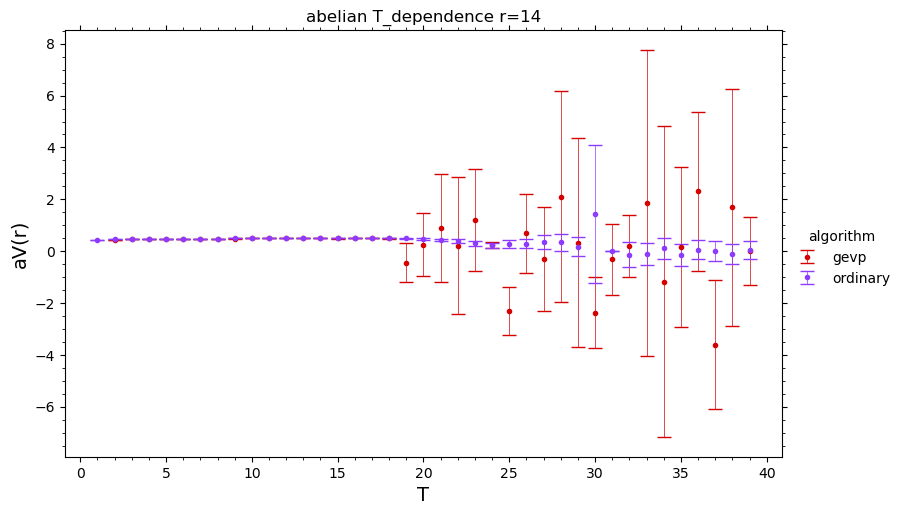

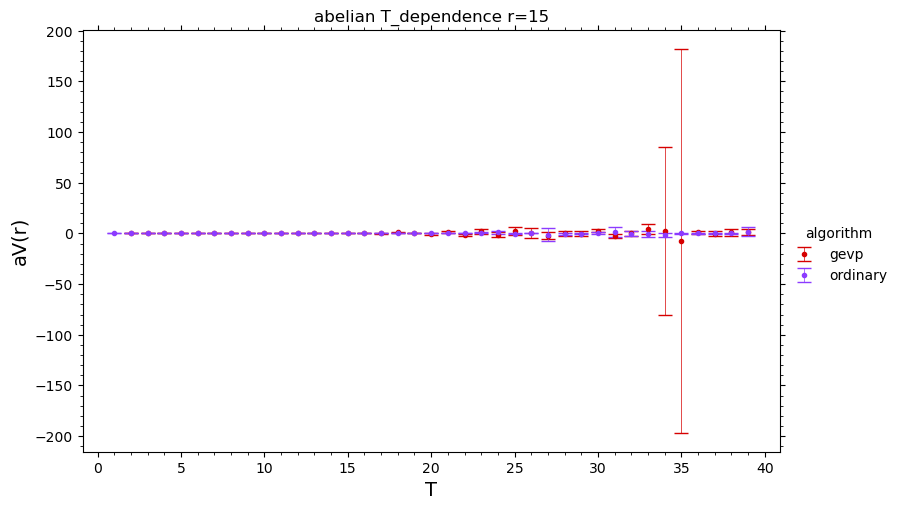

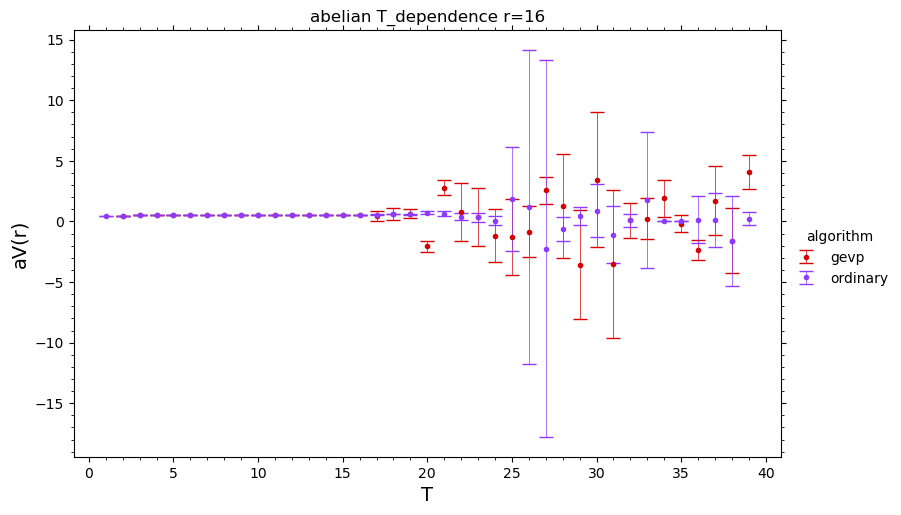

In [12]:
potential_T_dependence_ordinary_gevp_comparison('32^3x64', 'beta6.2', 'HYP0_alpha=1_1_0.5_APE_alpha=0.5', 'steps_500/copies=4', 'abelian', 31)

     space_size  time_size     aV(r)       err algorithm
0             1          2  0.007135  0.000038      gevp
1             1          3  0.006952  0.000016      gevp
2             1          4  0.006914  0.000010      gevp
3             1          5  0.006918  0.000009      gevp
4             1          6  0.006915  0.000007      gevp
..          ...        ...       ...       ...       ...
969          16         25  0.215834  0.002490  ordinary
970          16         26  0.212483  0.002954  ordinary
971          16         27  0.206864  0.003452  ordinary
972          16         28  0.198136  0.003951  ordinary
973          16         29  0.189523  0.004500  ordinary

[912 rows x 5 columns]


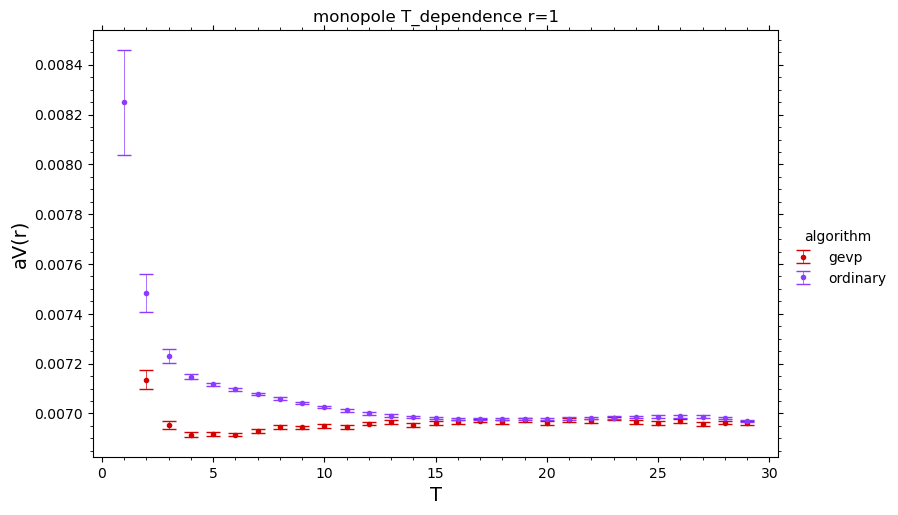

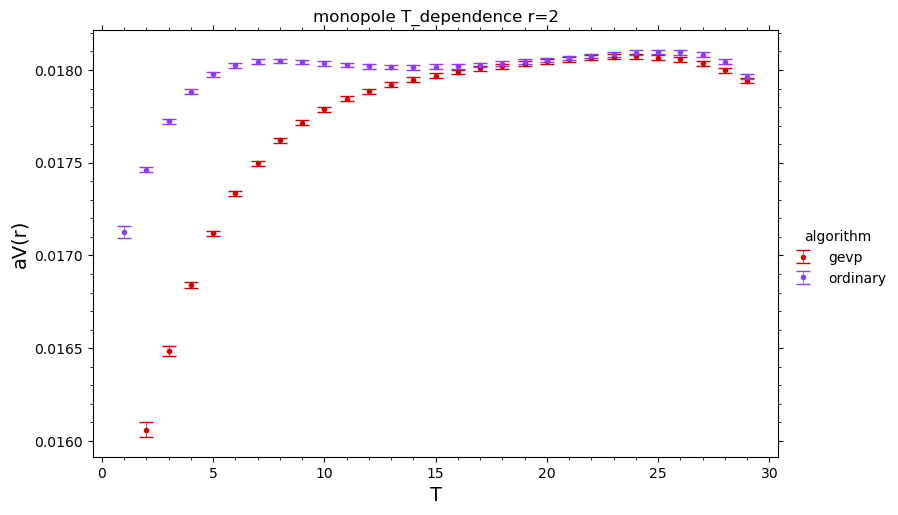

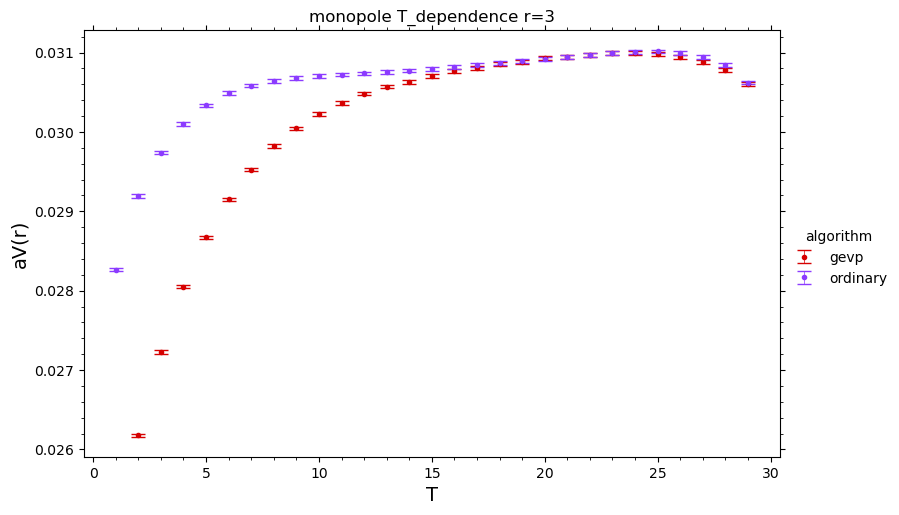

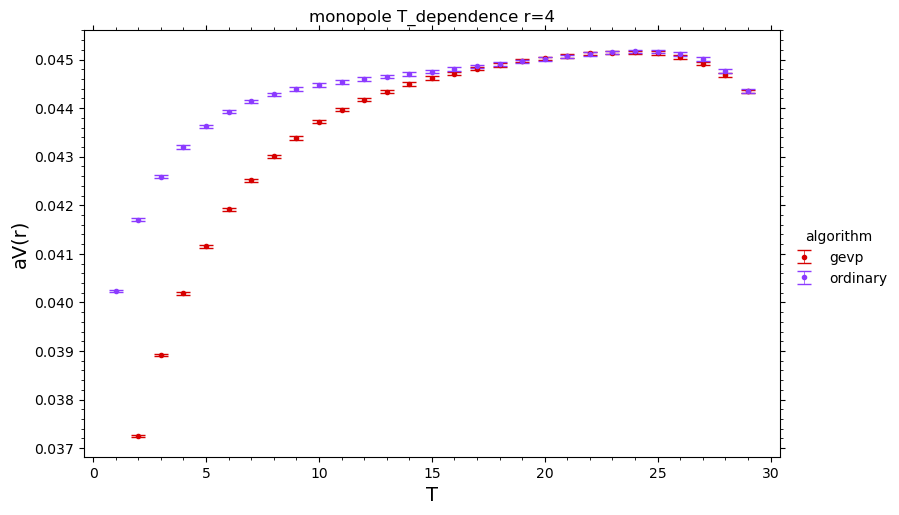

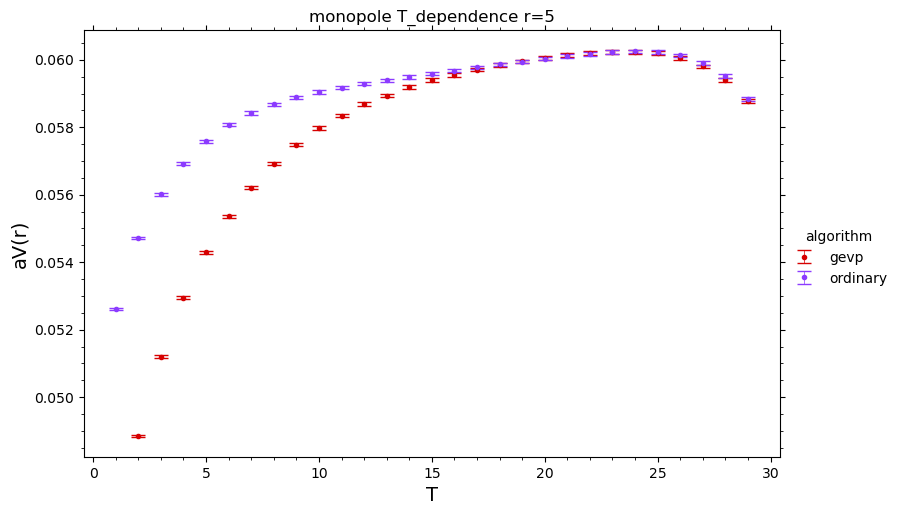

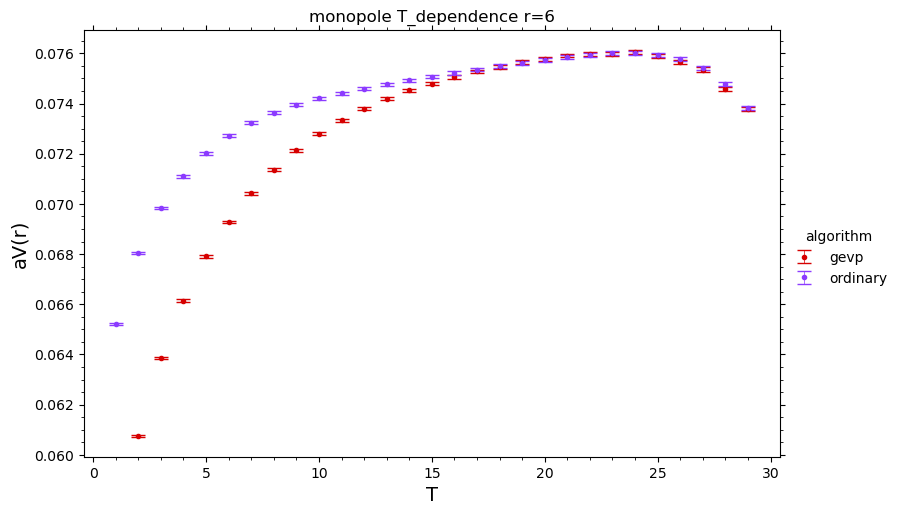

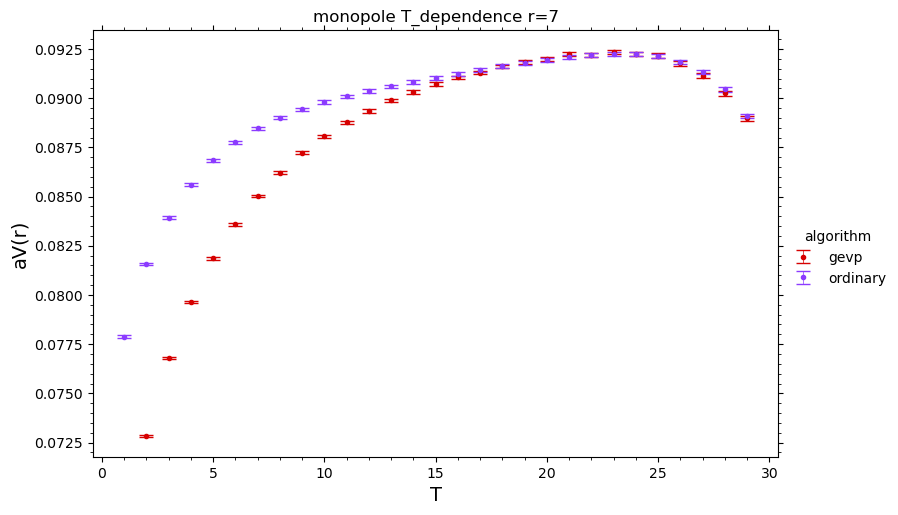

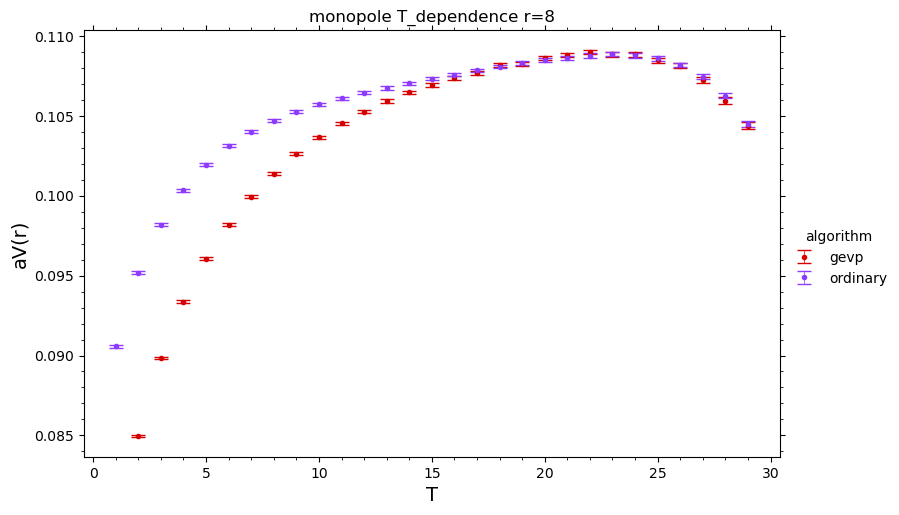

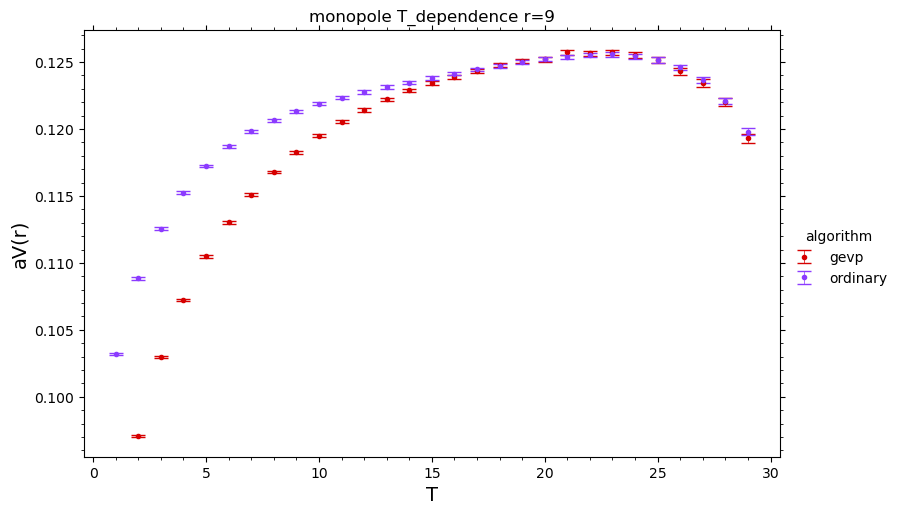

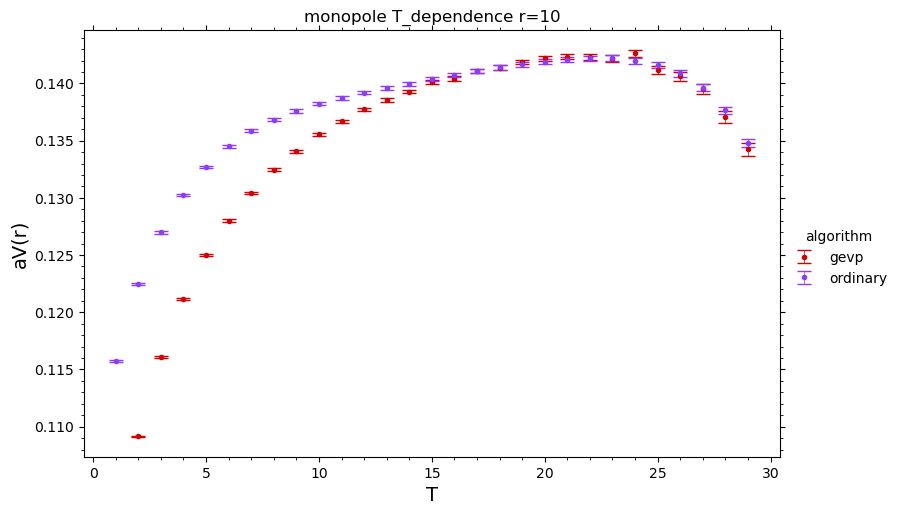

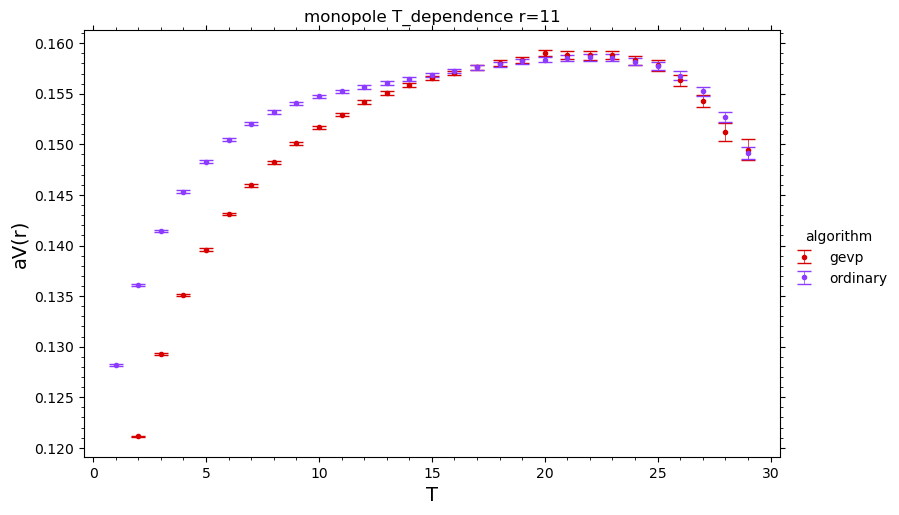

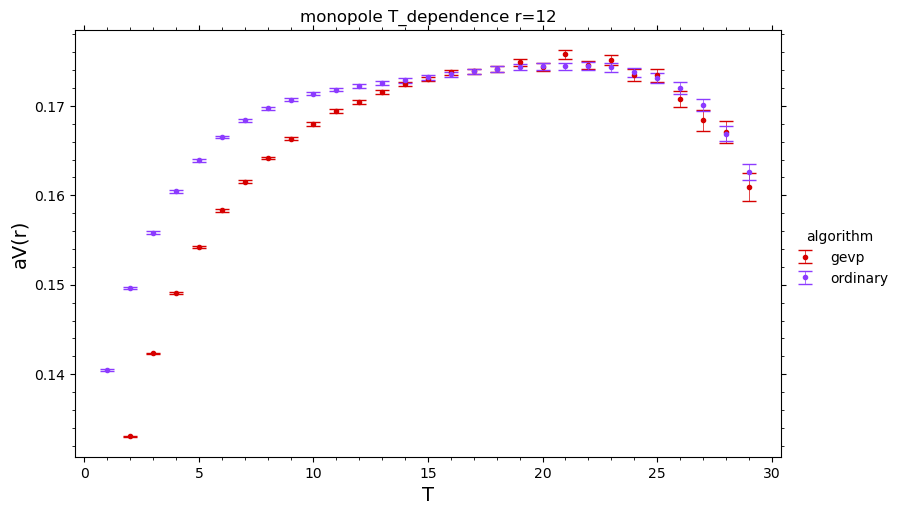

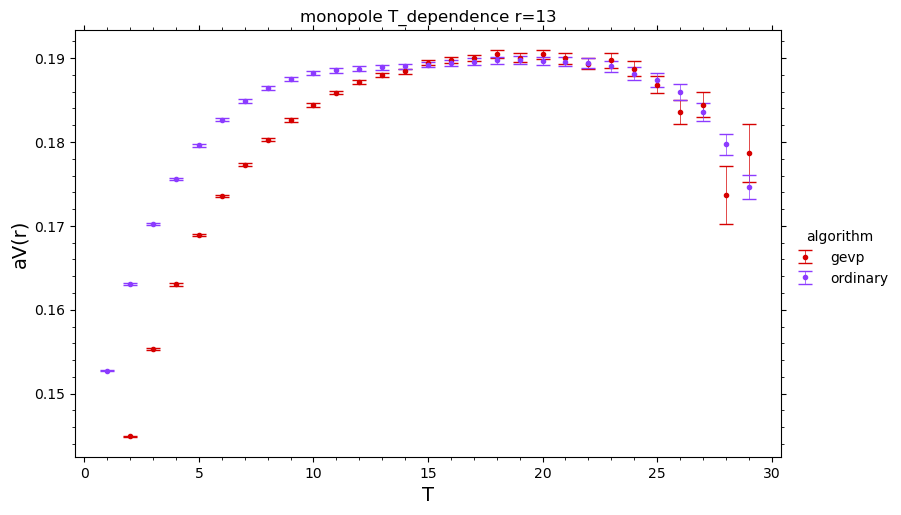

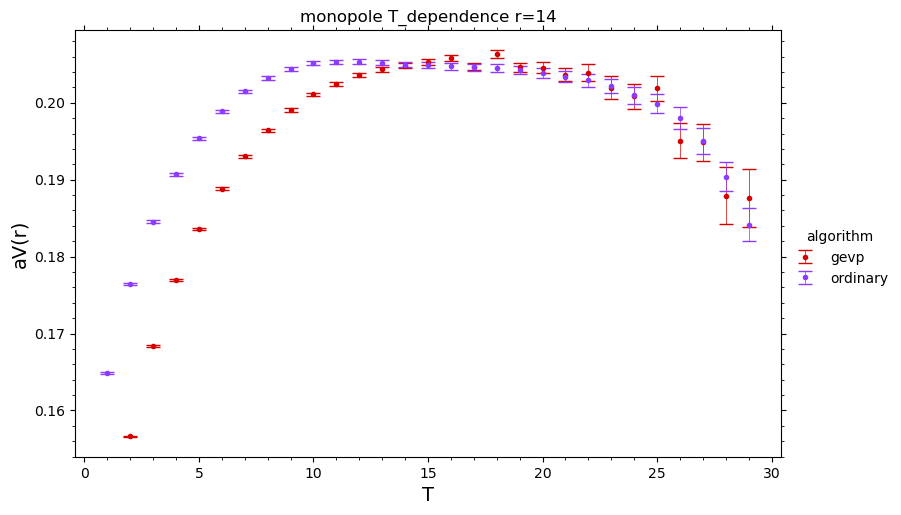

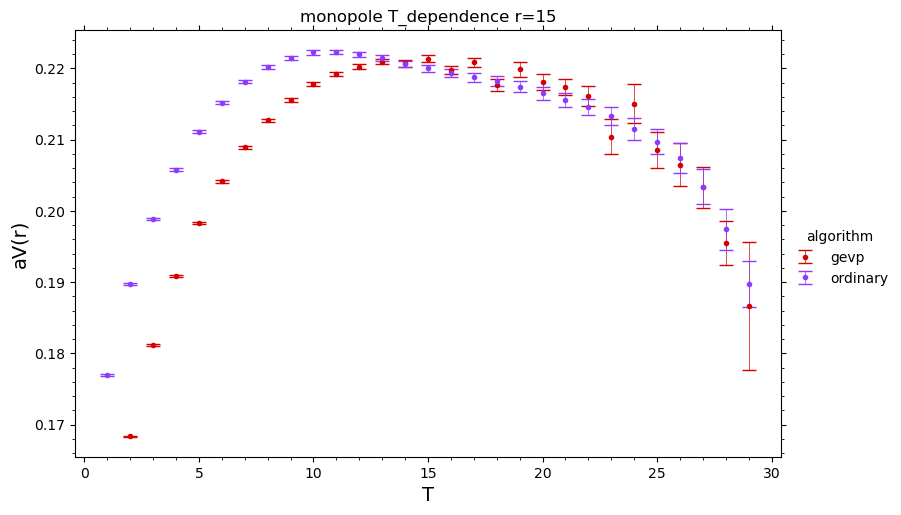

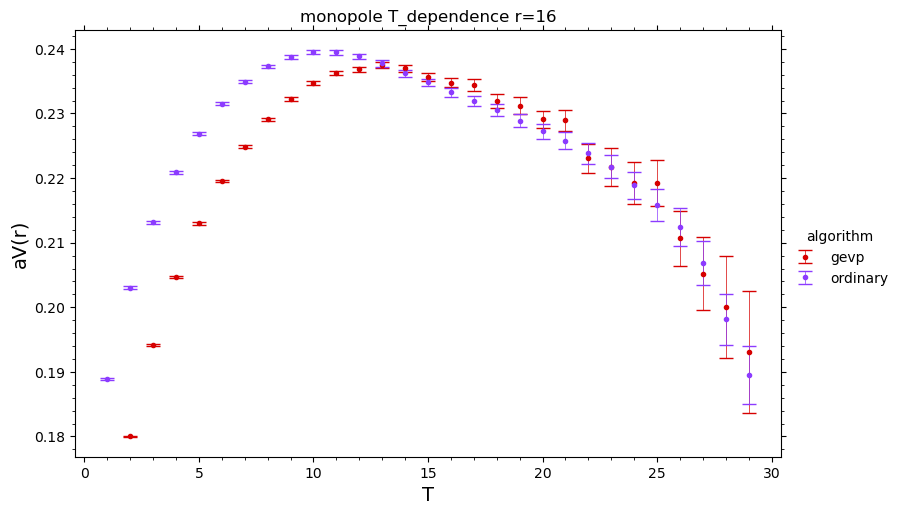

In [43]:
potential_T_dependence_ordinary_gevp_comparison('32^3x64', 'beta6.2', 'HYP0_alpha=1_1_0.5_APE_alpha=0.5', 'steps_500/copies=4', 'monopole', 31)

     space_size  time_size     aV(r)       err algorithm
0             1          2  0.003975  0.000005      gevp
1             1          3  0.004082  0.000005      gevp
2             1          4  0.004188  0.000005      gevp
3             1          5  0.004311  0.000006      gevp
4             1          6  0.004444  0.000006      gevp
..          ...        ...       ...       ...       ...
301          18         13  0.253458  0.000828  ordinary
302          18         14  0.255547  0.000952  ordinary
303          18         15  0.257523  0.001117  ordinary
304          18         16  0.259237  0.001323  ordinary
305          18         17  0.260783  0.001590  ordinary

[594 rows x 5 columns]


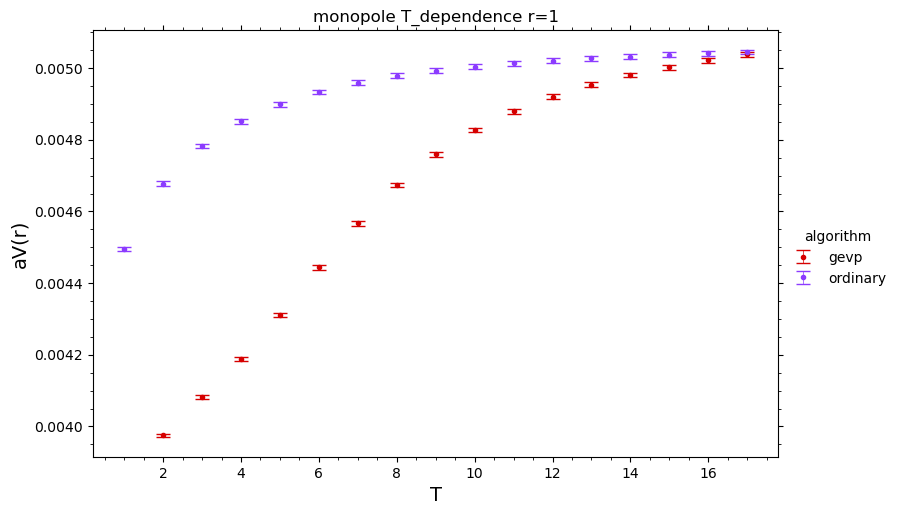

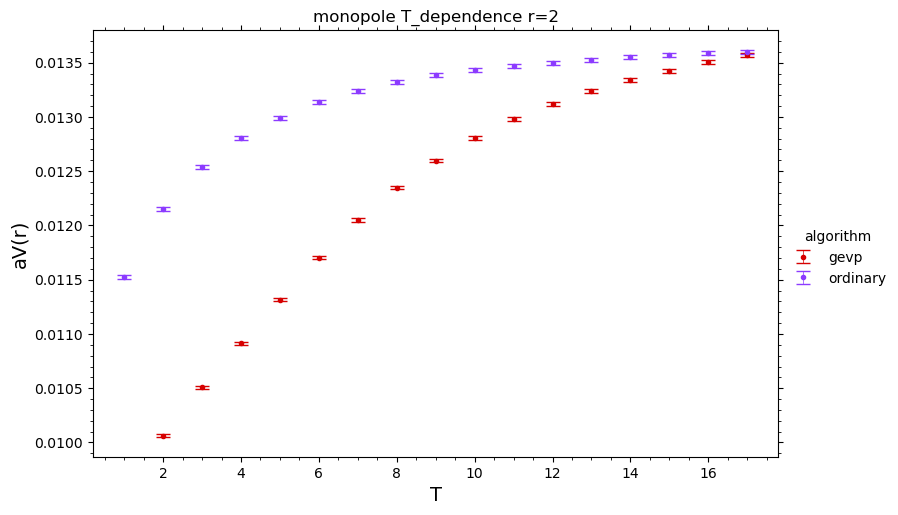

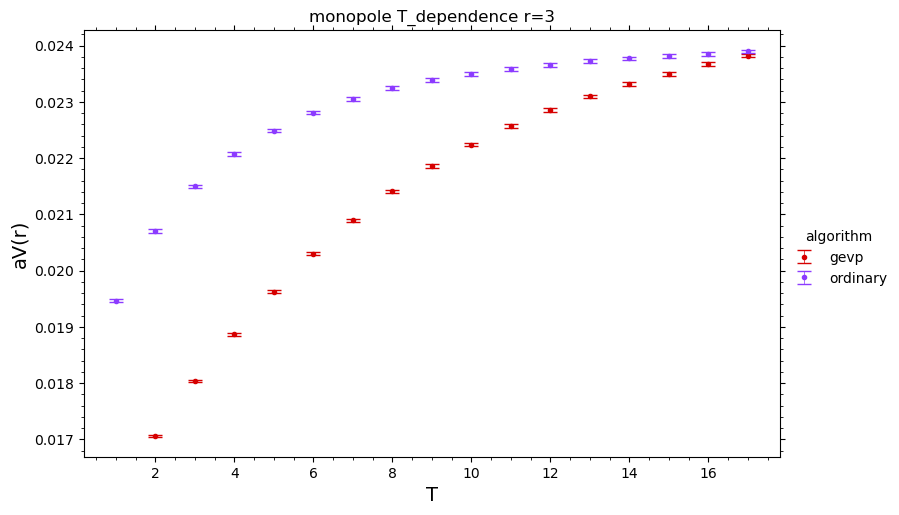

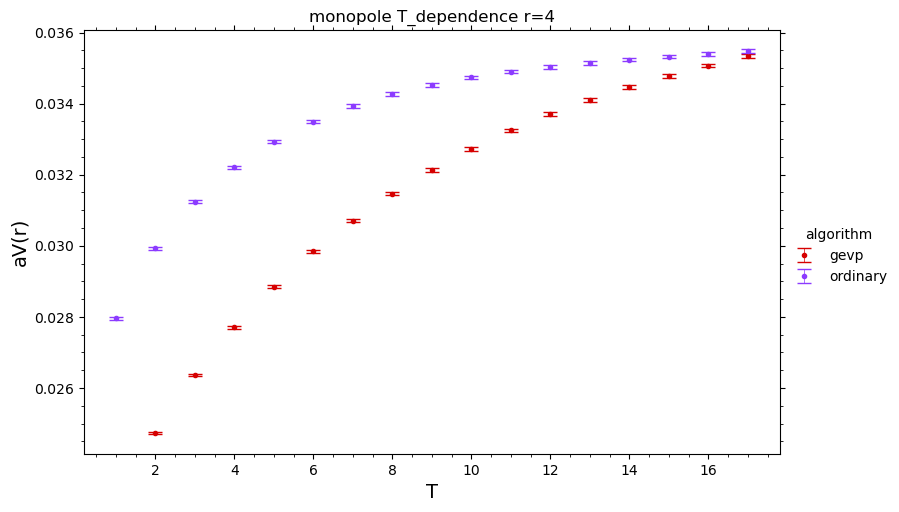

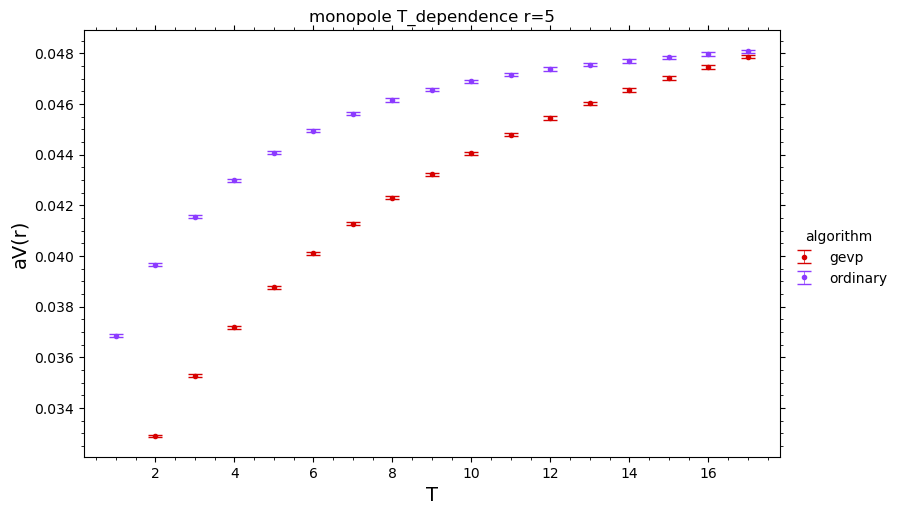

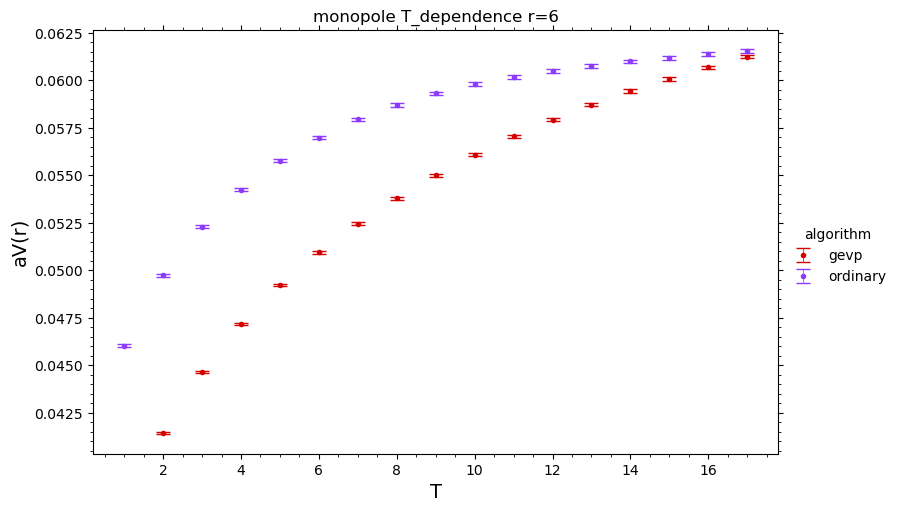

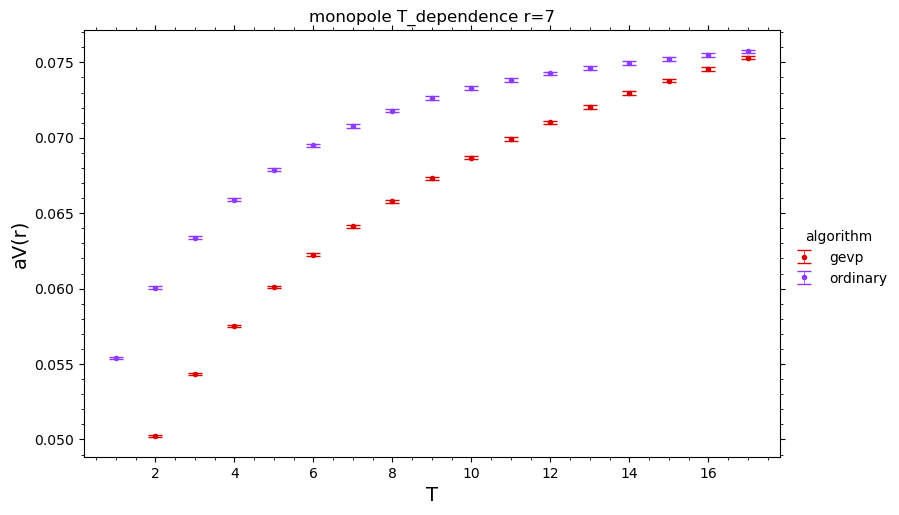

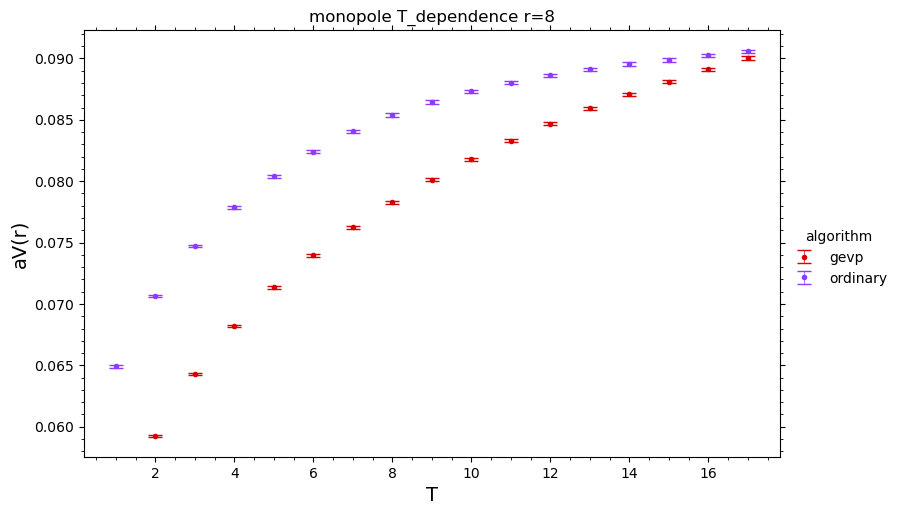

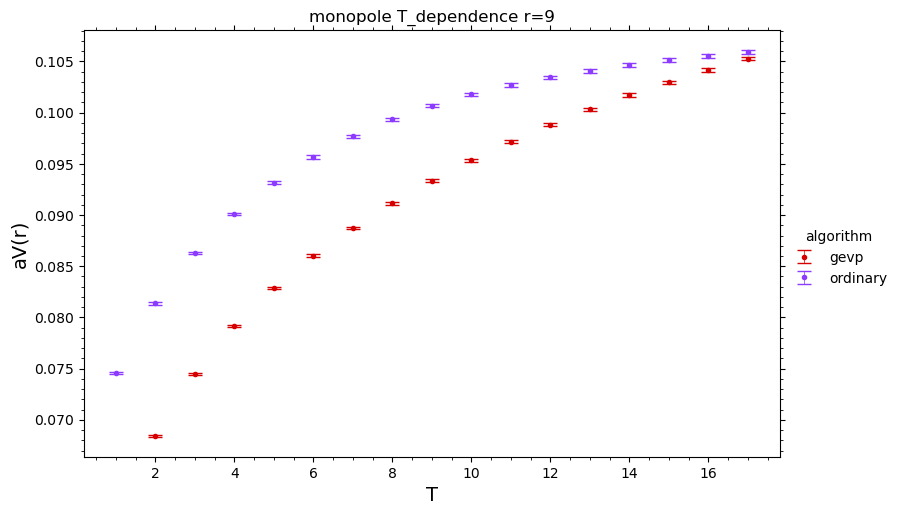

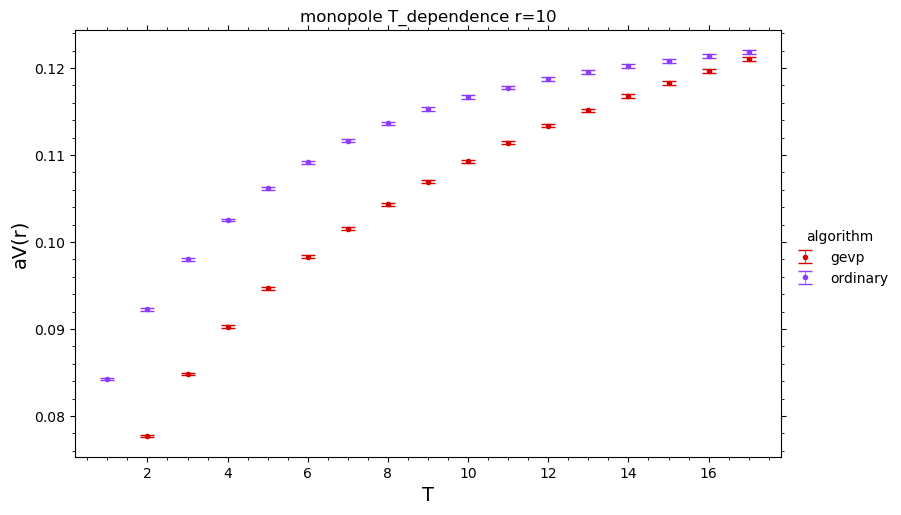

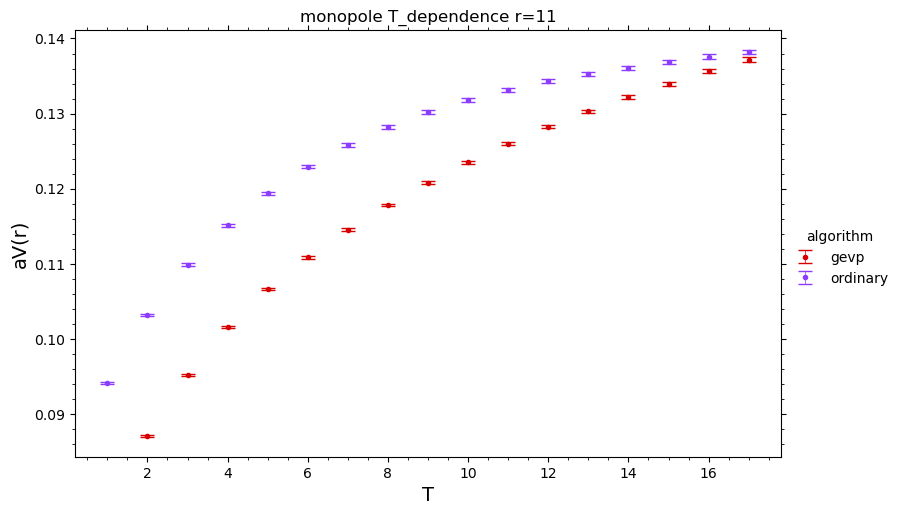

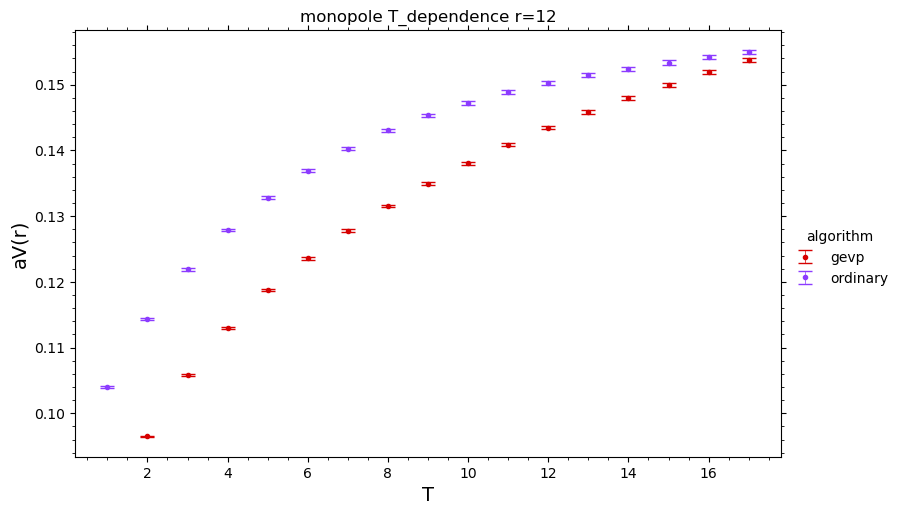

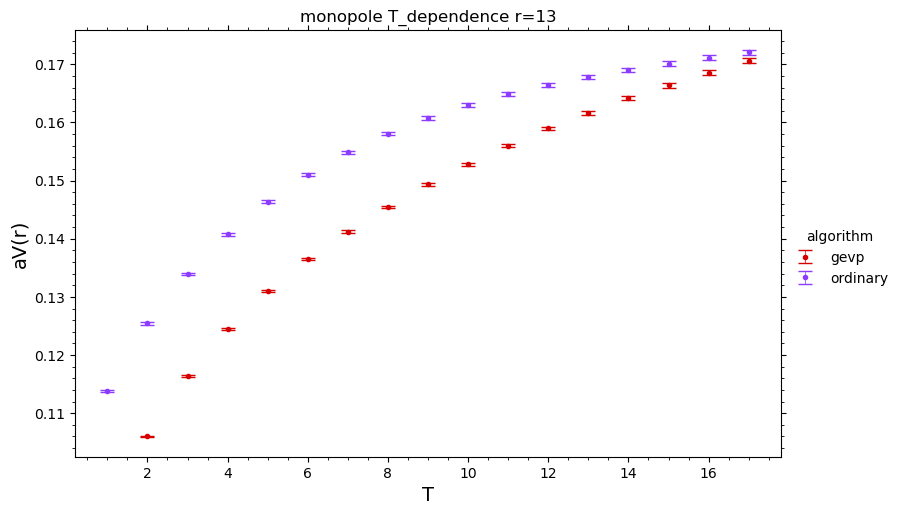

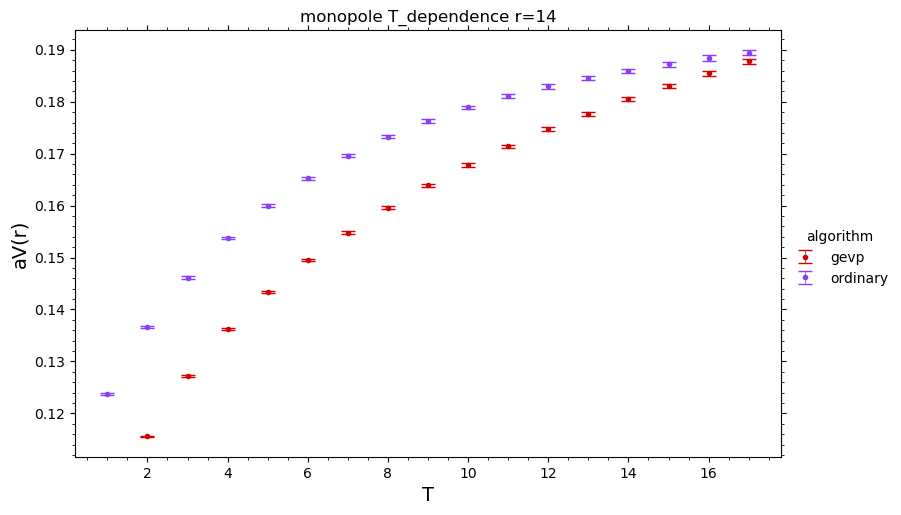

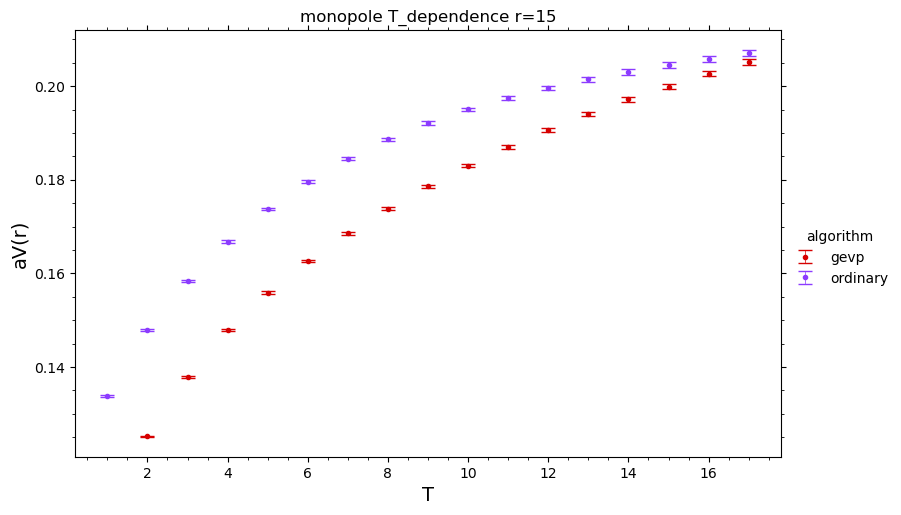

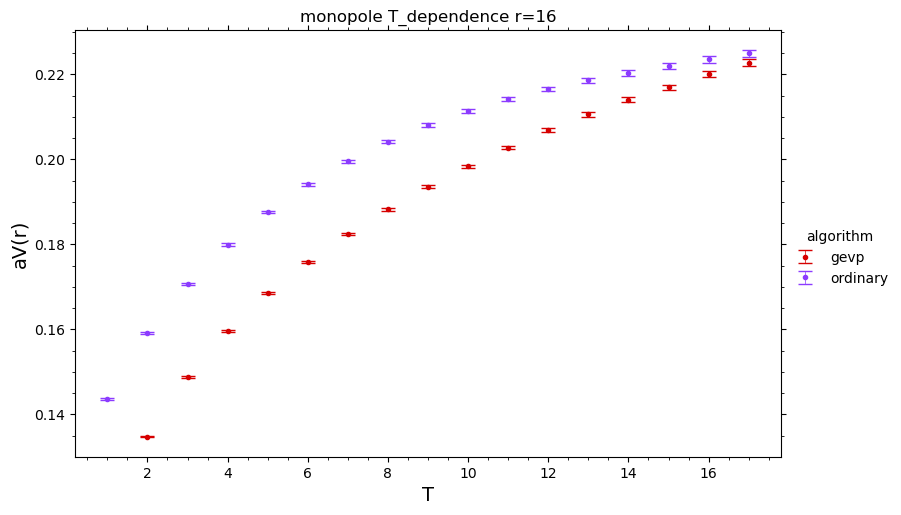

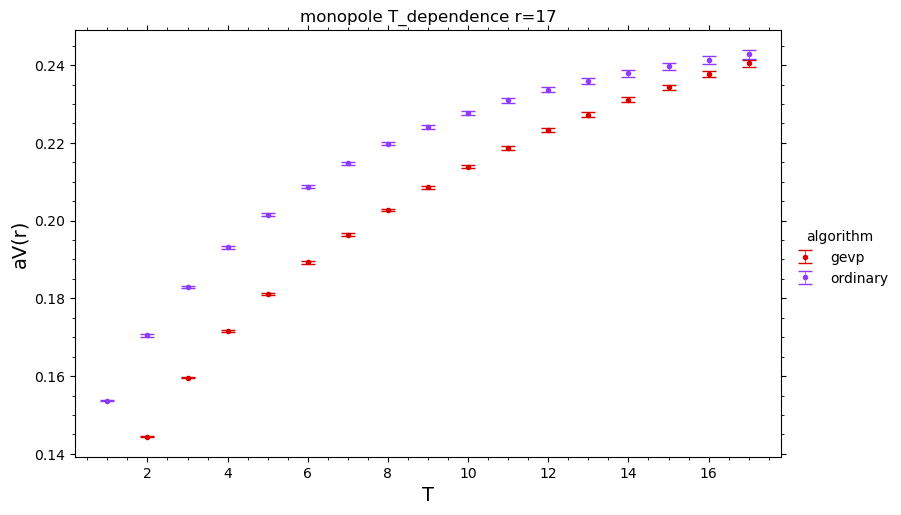

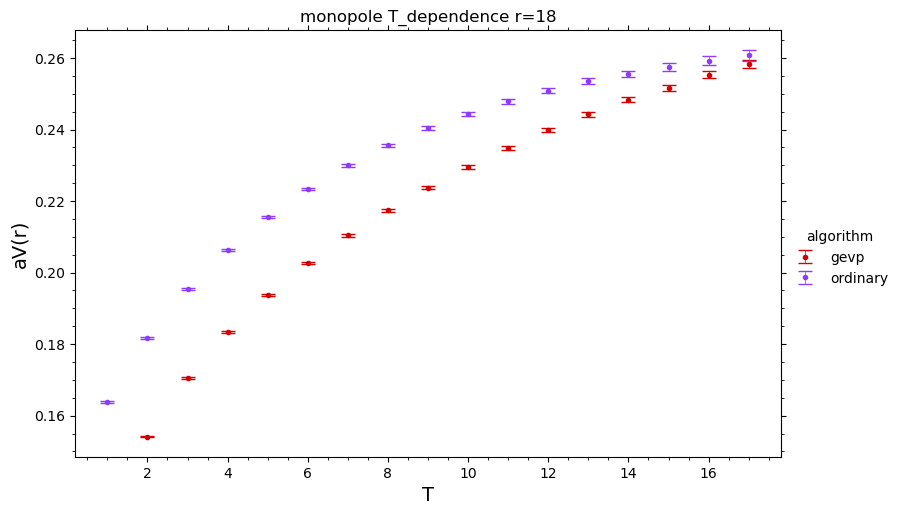

In [32]:
potential_T_dependence_ordinary_gevp_comparison('36^4', 'beta6.3', 'HYP0_alpha=1_1_0.5_APE_alpha=0.5', 'steps_0/copies=20', 'monopole', 31, 0)

     space_size  time_size     aV(r)       err algorithm
0             1          2  0.052250  0.000005      gevp
1             1          3  0.052169  0.000005      gevp
2             1          4  0.052158  0.000005      gevp
3             1          5  0.052157  0.000005      gevp
4             1          6  0.052157  0.000005      gevp
..          ...        ...       ...       ...       ...
115          12          7  0.696069  0.001908      gevp
116          12          8  0.697062  0.003335      gevp
117          12          9  0.692895  0.005877      gevp
118          12         10  0.680831  0.010471      gevp
119          12         11  0.668805  0.018141      gevp

[120 rows x 5 columns]
     space_size  time_size     aV(r)       err algorithm
0             1          1  0.053700  0.000005  ordinary
1             1          2  0.052554  0.000005  ordinary
2             1          3  0.052292  0.000004  ordinary
3             1          4  0.052206  0.000004  ordinary
4      

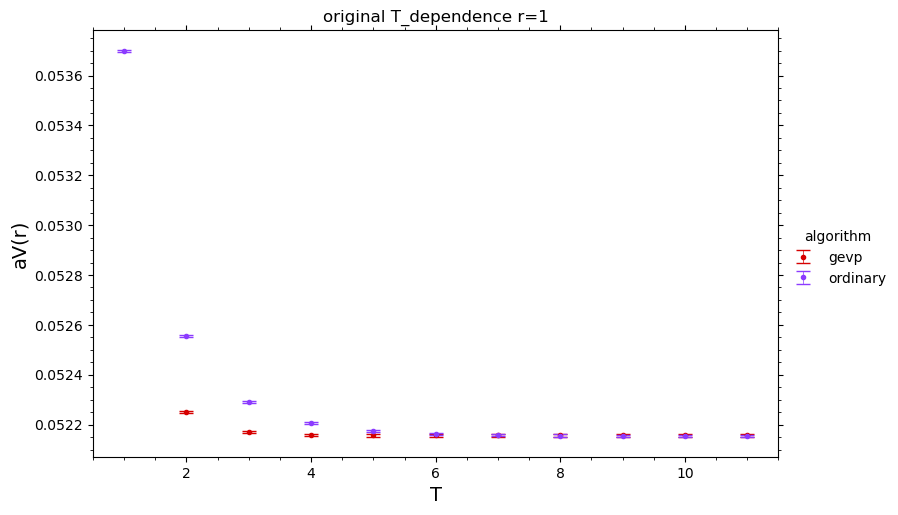

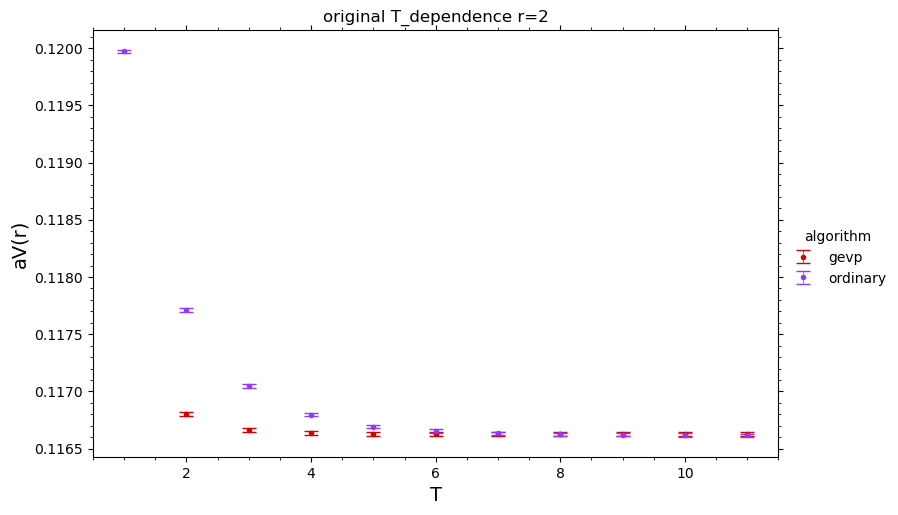

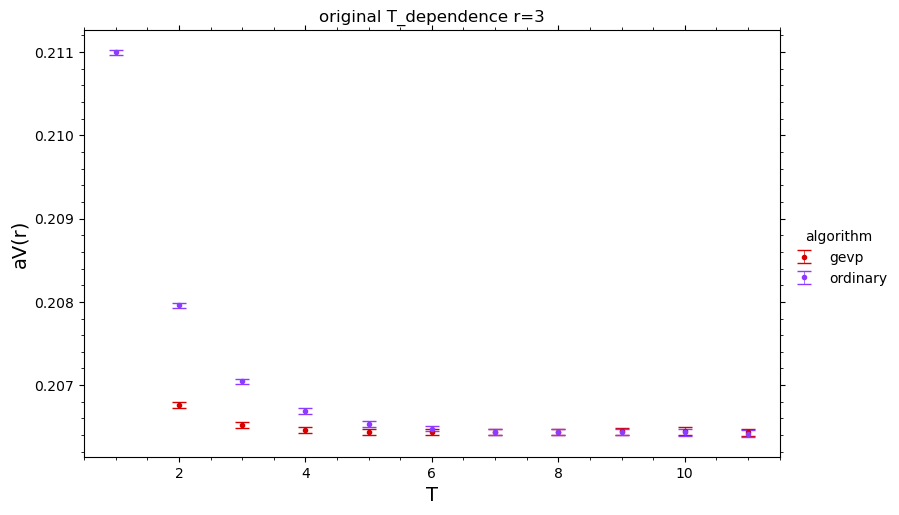

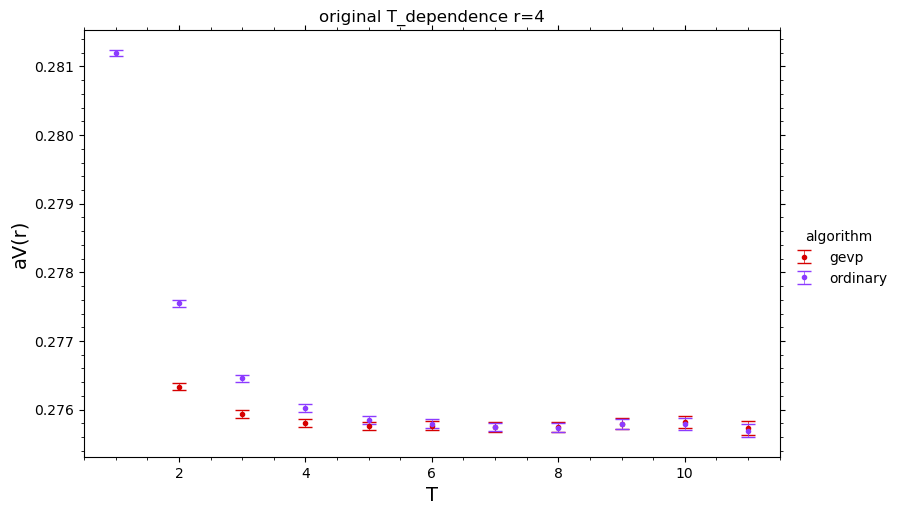

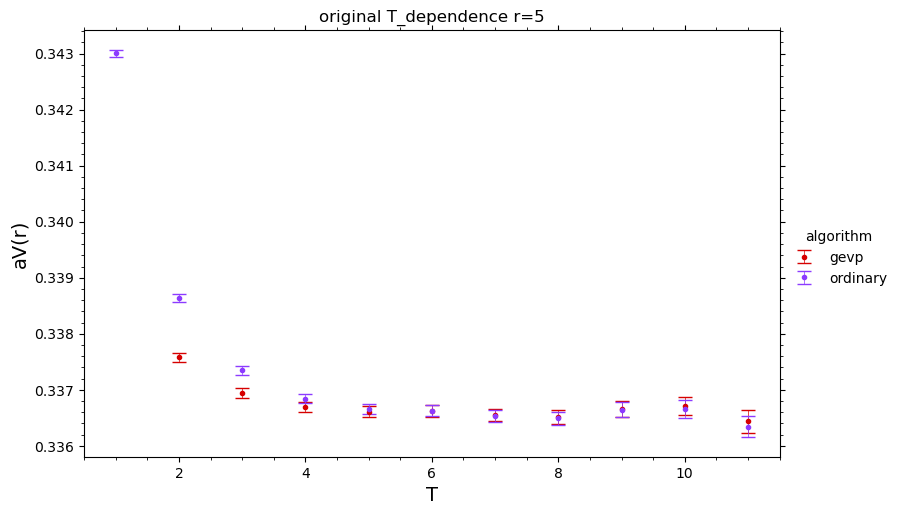

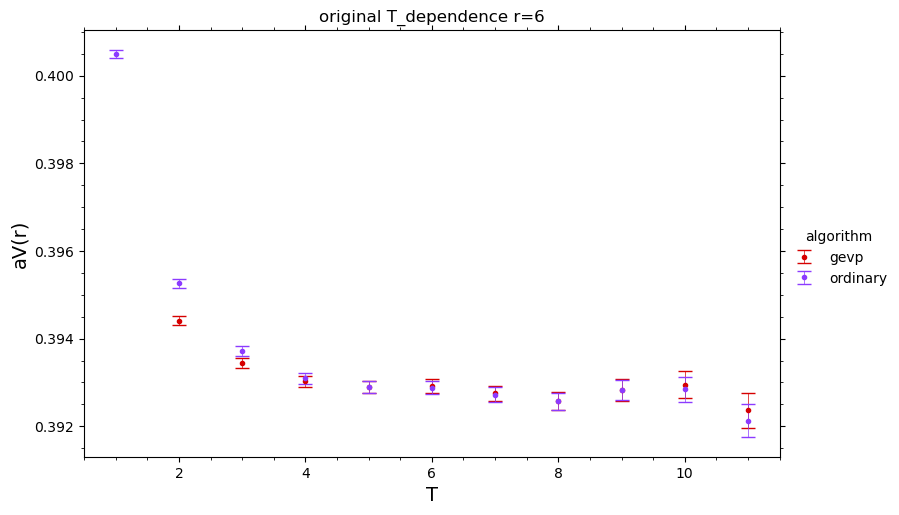

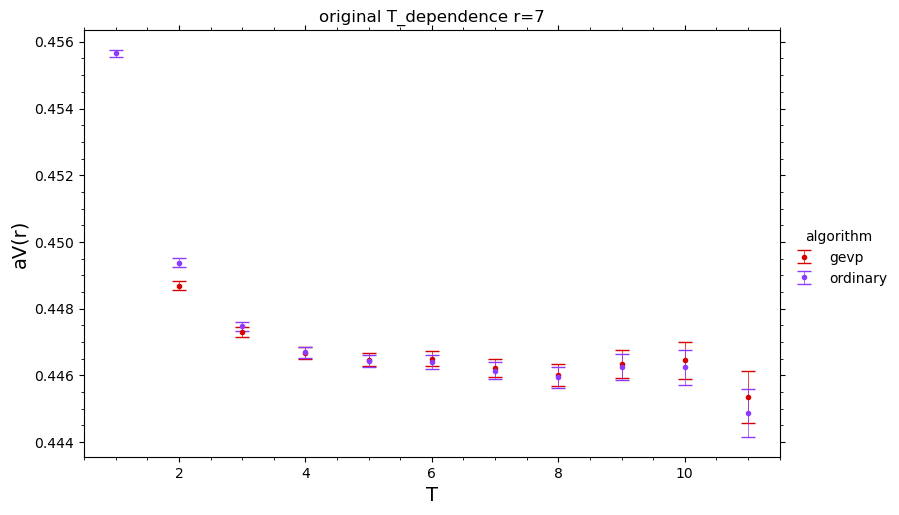

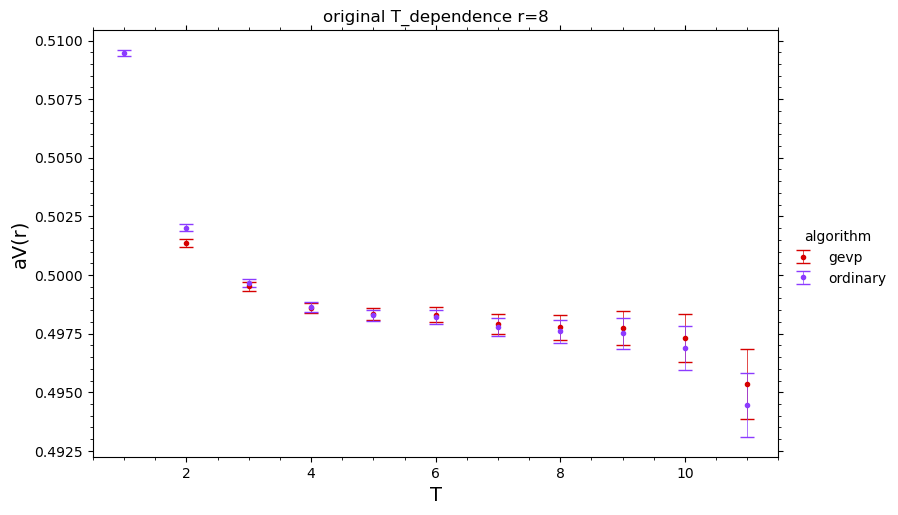

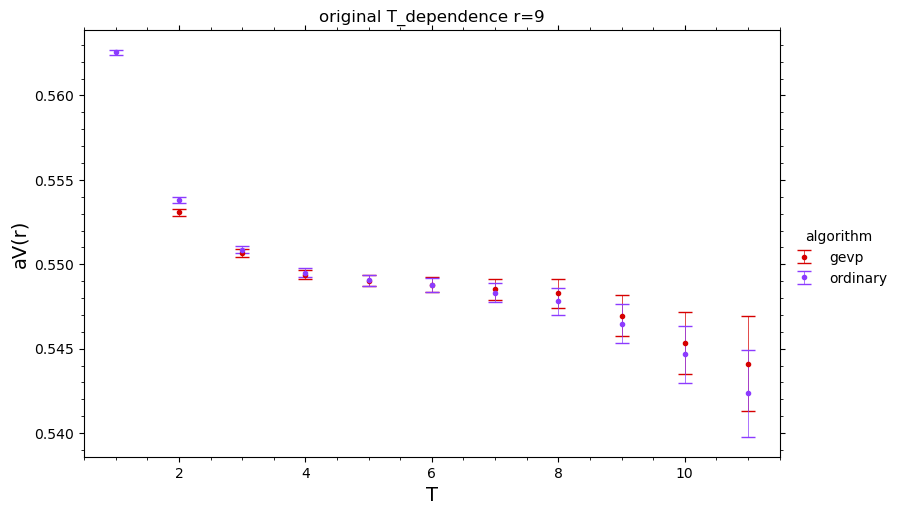

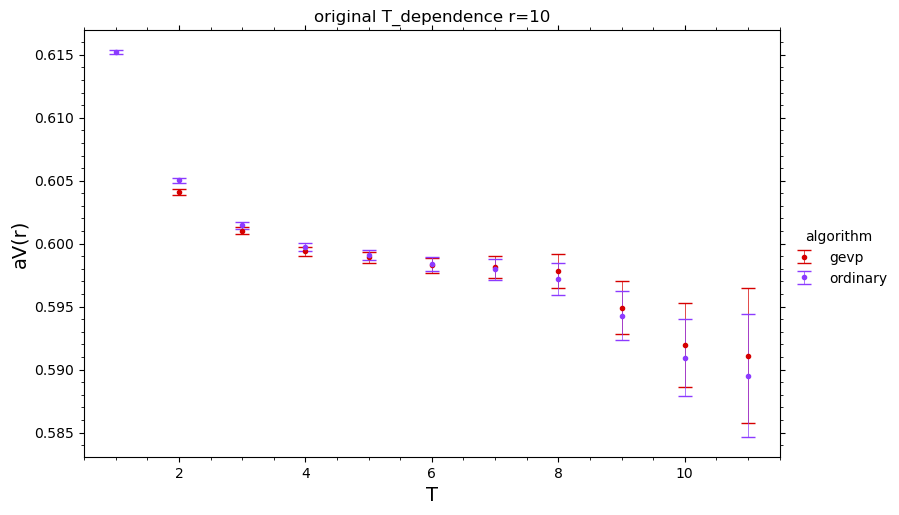

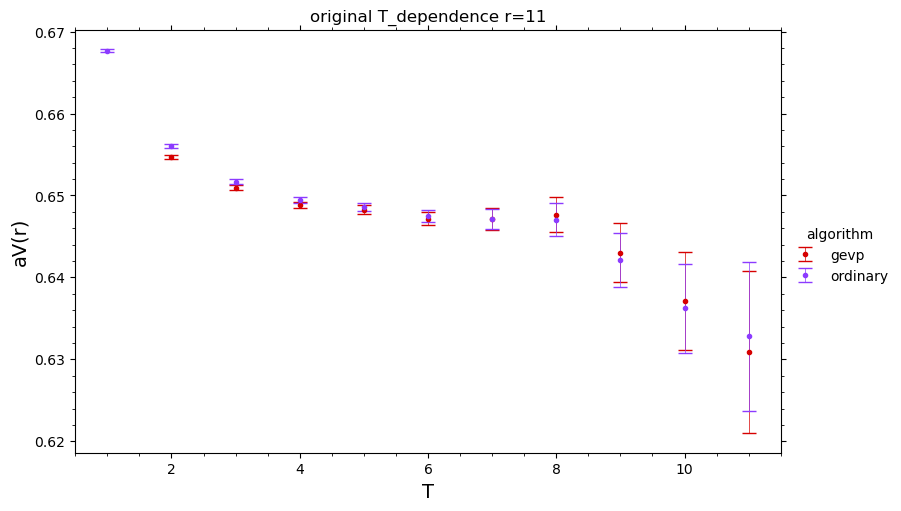

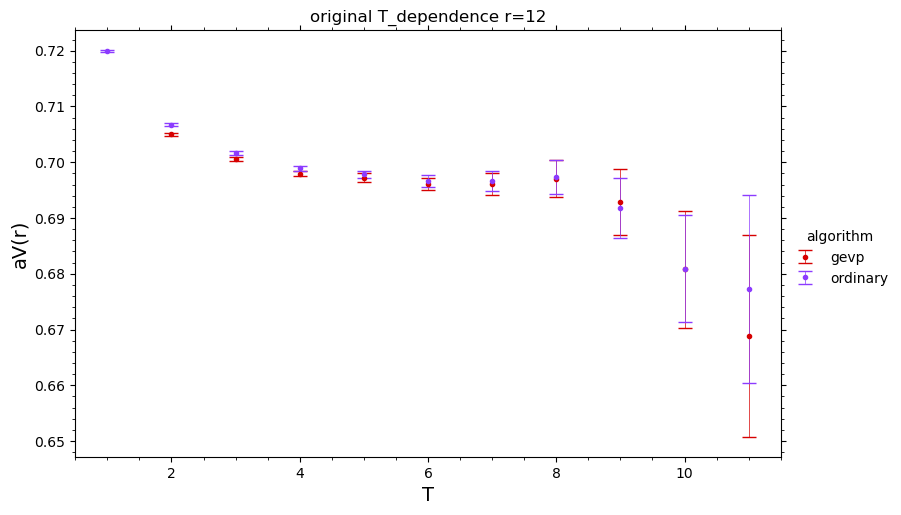

In [ ]:
potential_T_dependence_ordinary_gevp_comparison('24^4', 'beta6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=0.5', '', 'original', 51)

In [12]:
potential_T_dependence_gluodynamics('36^4', 36, '6.3', 'HYP0_APE_alpha=0.4', 'steps_0/copies=20', 'monopole', 151, 0)
potential_T_dependence_gluodynamics('36^4', 36, '6.3', 'HYP0_APE_alpha=0.45', 'steps_0/copies=20', 'monopole', 151, 0)
potential_T_dependence_gluodynamics('36^4', 36, '6.3', 'HYP0_APE_alpha=0.5', 'steps_0/copies=20', 'monopole', 151, 0)

       copy  smearing_step  space_size  time_size     aV(r)       err  \
0         0              0           1          1  0.003886  0.000005   
1         0              0           1          2  0.004311  0.000006   
2         0              0           1          3  0.004539  0.000006   
3         0              0           1          4  0.004684  0.000006   
4         0              0           1          5  0.004782  0.000006   
...     ...            ...         ...        ...       ...       ...   
27715     0            201          36         31 -0.549620  0.001707   
27716     0            201          36         32 -0.530158  0.001219   
27717     0            201          36         33 -0.507146  0.000937   
27718     0            201          36         34 -0.474069  0.000764   
27719     0            201          36         35 -0.430025  0.000642   

           beta  
0      beta=6.3  
1      beta=6.3  
2      beta=6.3  
3      beta=6.3  
4      beta=6.3  
...         ...

In [3]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.3', 'steps_500/copies=4', 'monopole', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.4', 'steps_500/copies=4', 'monopole', 151)

In [4]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.5', 'steps_500/copies=4', 'monopole', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.6', 'steps_500/copies=4', 'monopole', 151)

In [5]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.7', 'steps_500/copies=4', 'monopole', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.8', 'steps_500/copies=4', 'monopole', 151)

In [6]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.9', 'steps_500/copies=4', 'monopole', 151)

In [7]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=1', 'steps_500/copies=4', 'monopole', 151)

In [8]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=0.3', 'steps_500/copies=4', 'monopole', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=0.4', 'steps_500/copies=4', 'monopole', 151)

In [9]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=0.5', 'steps_500/copies=4', 'monopole', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=0.6', 'steps_500/copies=4', 'monopole', 151)

In [10]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=0.7', 'steps_500/copies=4', 'monopole', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=0.8', 'steps_500/copies=4', 'monopole', 151)

In [11]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=0.9', 'steps_500/copies=4', 'monopole', 151)

In [12]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=1', 'steps_500/copies=4', 'monopole', 151)

In [13]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP3_alpha=1_1_0.5_APE_alpha=0.3', 'steps_500/copies=4', 'monopole', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP3_alpha=1_1_0.5_APE_alpha=0.4', 'steps_500/copies=4', 'monopole', 151)

In [14]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP3_alpha=1_1_0.5_APE_alpha=0.5', 'steps_500/copies=4', 'monopole', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP3_alpha=1_1_0.5_APE_alpha=0.6', 'steps_500/copies=4', 'monopole', 151)

In [15]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP3_alpha=1_1_0.5_APE_alpha=0.7', 'steps_500/copies=4', 'monopole', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP3_alpha=1_1_0.5_APE_alpha=0.8', 'steps_500/copies=4', 'monopole', 151)

In [16]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP3_alpha=1_1_0.5_APE_alpha=0.9', 'steps_500/copies=4', 'monopole', 151)

In [17]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP3_alpha=1_1_0.5_APE_alpha=1', 'steps_500/copies=4', 'monopole', 151)

In [3]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.3', 'steps_500/copies=4', 'monopoless', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.4', 'steps_500/copies=4', 'monopoless', 151)

In [4]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.5', 'steps_500/copies=4', 'monopoless', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.6', 'steps_500/copies=4', 'monopoless', 151)

In [5]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.7', 'steps_500/copies=4', 'monopoless', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.8', 'steps_500/copies=4', 'monopoless', 151)

In [6]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.9', 'steps_500/copies=4', 'monopoless', 151)

In [7]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=1', 'steps_500/copies=4', 'monopoless', 151)

In [8]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=0.3', 'steps_500/copies=4', 'monopoless', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=0.4', 'steps_500/copies=4', 'monopoless', 151)

In [9]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=0.5', 'steps_500/copies=4', 'monopoless', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=0.6', 'steps_500/copies=4', 'monopoless', 151)

In [10]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=0.7', 'steps_500/copies=4', 'monopoless', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=0.8', 'steps_500/copies=4', 'monopoless', 151)

In [11]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=0.9', 'steps_500/copies=4', 'monopoless', 151)

In [12]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=1', 'steps_500/copies=4', 'monopoless', 151)

In [13]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP3_alpha=1_1_0.5_APE_alpha=0.3', 'steps_500/copies=4', 'monopoless', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP3_alpha=1_1_0.5_APE_alpha=0.4', 'steps_500/copies=4', 'monopoless', 151)

In [14]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP3_alpha=1_1_0.5_APE_alpha=0.5', 'steps_500/copies=4', 'monopoless', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP3_alpha=1_1_0.5_APE_alpha=0.6', 'steps_500/copies=4', 'monopoless', 151)

In [15]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP3_alpha=1_1_0.5_APE_alpha=0.7', 'steps_500/copies=4', 'monopoless', 151)
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP3_alpha=1_1_0.5_APE_alpha=0.8', 'steps_500/copies=4', 'monopoless', 151)

In [16]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP3_alpha=1_1_0.5_APE_alpha=0.9', 'steps_500/copies=4', 'monopoless', 151)

In [17]:
potential_T_dependence_gluodynamics('24^4', 24, '6.0', 'HYP3_alpha=1_1_0.5_APE_alpha=1', 'steps_500/copies=4', 'monopoless', 151)